In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [13]:
df=pd.read_csv("lung cancer survey.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Data Preprocessing

In [227]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [229]:
df.shape

(309, 16)

In [230]:
df.isnull().values.any()

np.False_

In [231]:
df['GENDER'].value_counts()

GENDER
1    162
0    147
Name: count, dtype: int64

In [232]:
df['AGE'].value_counts()

AGE
64    20
56    19
63    19
62    18
60    17
61    16
59    15
70    15
58    13
67    13
55    11
69    11
72    10
71    10
57     9
68     9
77     9
54     8
51     8
65     7
74     6
75     5
52     4
47     4
73     4
66     4
53     4
76     4
49     3
48     2
44     2
81     2
78     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [233]:
df['SMOKING'].value_counts()

SMOKING
1    174
0    135
Name: count, dtype: int64

In [234]:
df['ALCOHOL CONSUMING'].value_counts()

ALCOHOL CONSUMING
1    172
0    137
Name: count, dtype: int64

In [235]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

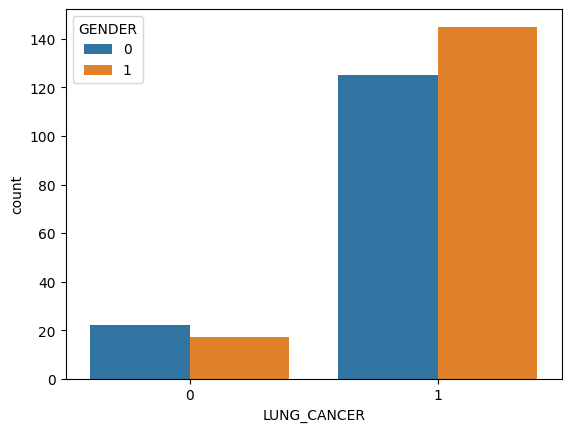

In [236]:
sns.countplot(x=df['LUNG_CANCER'],hue='GENDER',data=df)

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

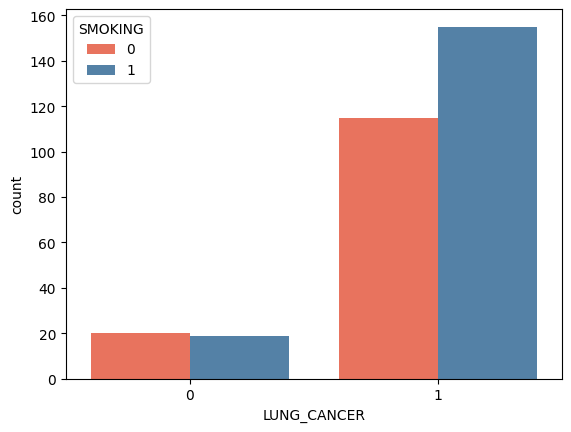

In [237]:
sns.countplot(x=df['LUNG_CANCER'],hue='SMOKING',data=df, palette=['#FF6347', '#4682B4'])

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

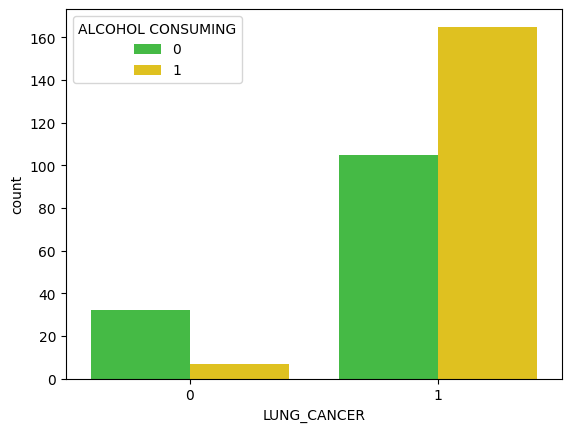

In [238]:
sns.countplot(x=df['LUNG_CANCER'],hue='ALCOHOL CONSUMING',data=df, palette=['#32CD32', '#FFD700'])

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

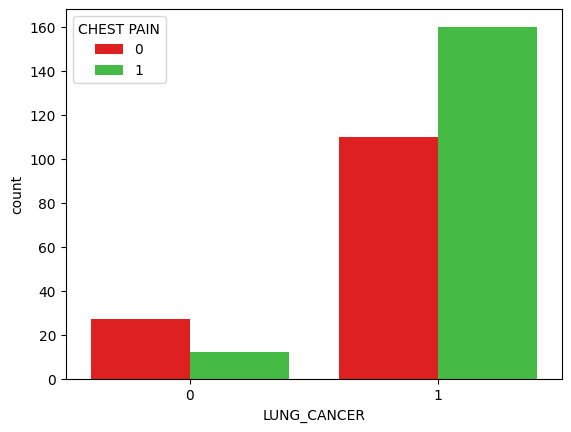

In [239]:
sns.countplot(x=df['LUNG_CANCER'],hue='CHEST PAIN',data=df, palette=['red', '#32CD32'])

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

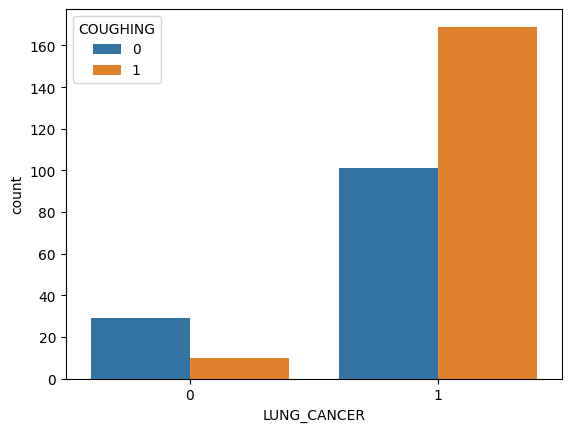

In [240]:
sns.countplot(x=df['LUNG_CANCER'],hue='COUGHING',data=df)

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

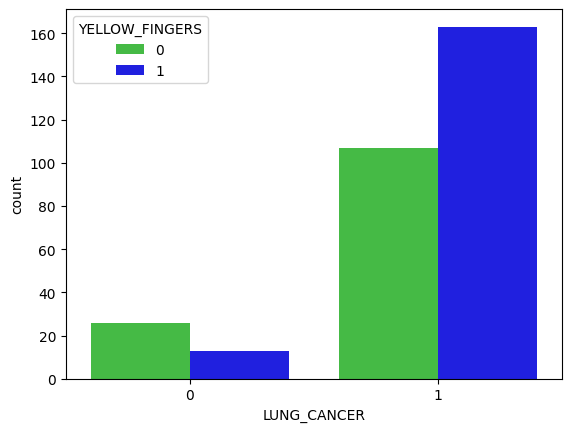

In [241]:
sns.countplot(x=df['LUNG_CANCER'],hue='YELLOW_FINGERS',data=df, palette=['#32CD32', 'blue'])

<Axes: xlabel='GENDER', ylabel='SMOKING'>

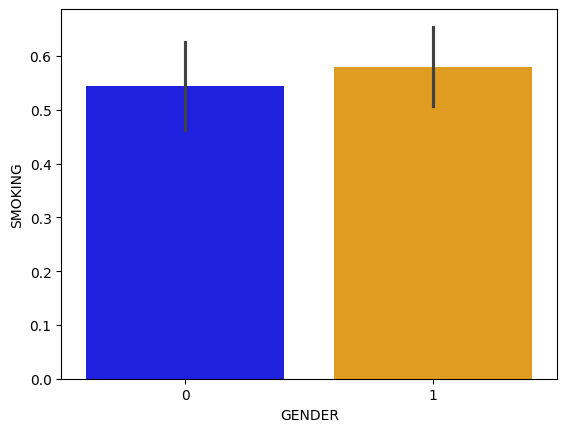

In [242]:
sns.barplot(x=df['GENDER'],y=df['SMOKING'],data=df, palette=['blue', 'orange'])

<Axes: xlabel='GENDER', ylabel='ALCOHOL CONSUMING'>

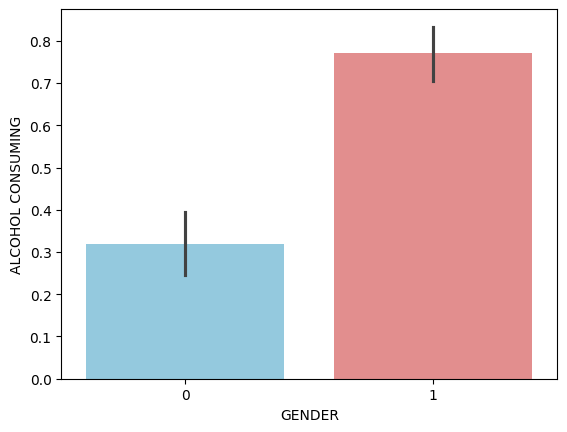

In [243]:
sns.barplot(x=df['GENDER'],y=df['ALCOHOL CONSUMING'],data=df, palette=['skyblue', 'lightcoral'])

<Axes: xlabel='GENDER', ylabel='ANXIETY'>

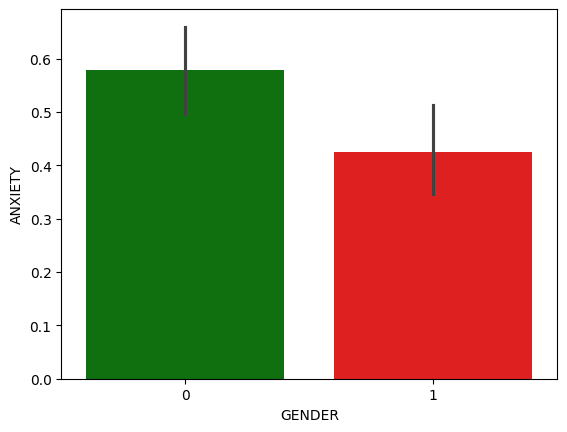

In [244]:
sns.barplot(x=df['GENDER'],y=df['ANXIETY'],data=df, palette=['green', 'red'])

<Axes: xlabel='GENDER', ylabel='FATIGUE'>

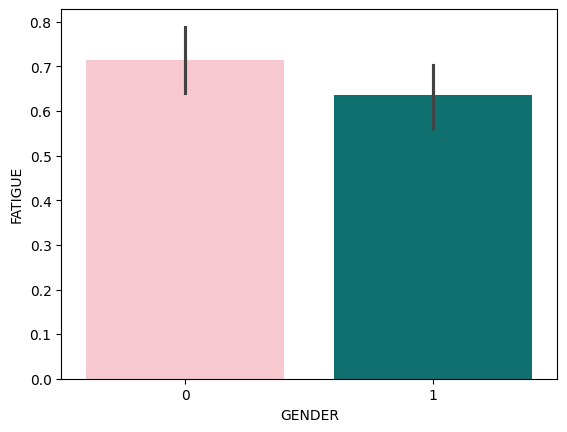

In [245]:
sns.barplot(x=df['GENDER'],y=df['FATIGUE'],data=df, palette=['pink', 'teal'])

<Axes: xlabel='GENDER', ylabel='CHRONIC DISEASE'>

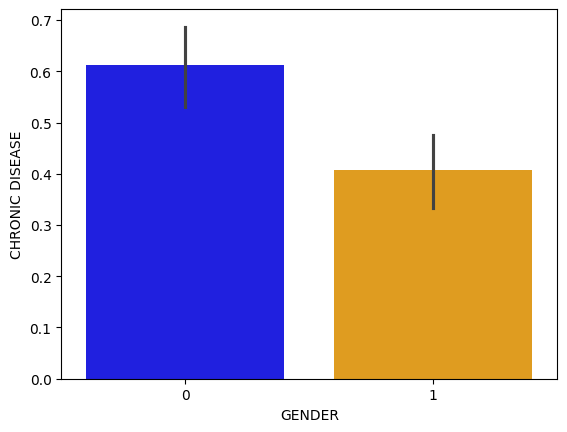

In [246]:
sns.barplot(x=df['GENDER'],y=df['CHRONIC DISEASE'],data=df, palette=['blue', 'orange'])

<Axes: xlabel='LUNG_CANCER', ylabel='CHEST PAIN'>

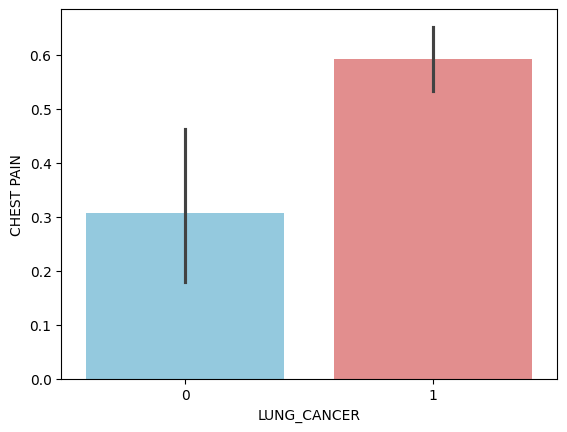

In [247]:
sns.barplot(x=df['LUNG_CANCER'],y=df['CHEST PAIN'],data=df, palette=['skyblue', 'lightcoral'])

<Axes: xlabel='LUNG_CANCER', ylabel='SHORTNESS OF BREATH'>

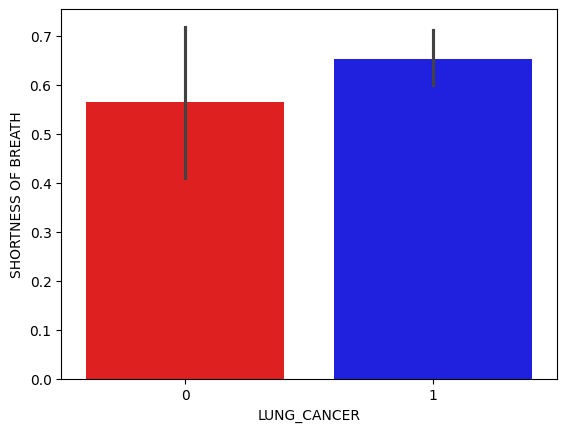

In [248]:
sns.barplot(x=df['LUNG_CANCER'],y=df['SHORTNESS OF BREATH'],data=df, palette=['red', 'blue'])

<Axes: xlabel='LUNG_CANCER', ylabel='ANXIETY'>

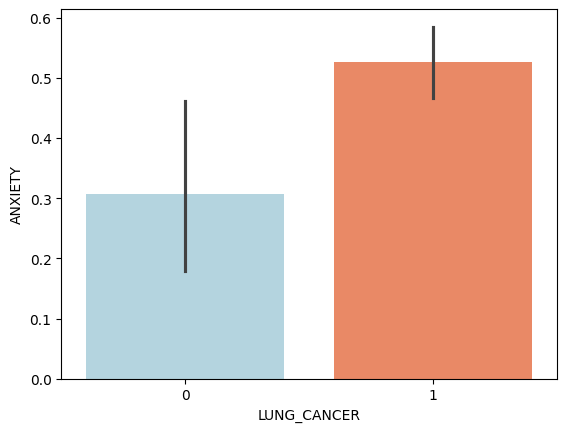

In [5]:
sns.barplot(x=df['LUNG_CANCER'],y=df['ANXIETY'],data=df, palette=['lightblue', 'coral'])

<Axes: xlabel='LUNG_CANCER', ylabel='PEER_PRESSURE'>

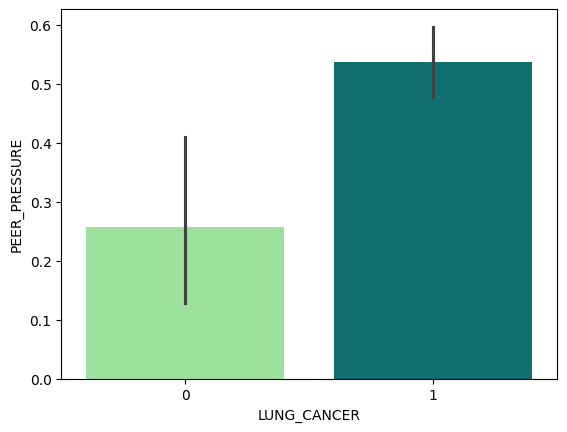

In [6]:
sns.barplot(x=df['LUNG_CANCER'],y=df['PEER_PRESSURE'],data=df, palette=['lightgreen', 'teal'])

<Axes: xlabel='LUNG_CANCER', ylabel='FATIGUE'>

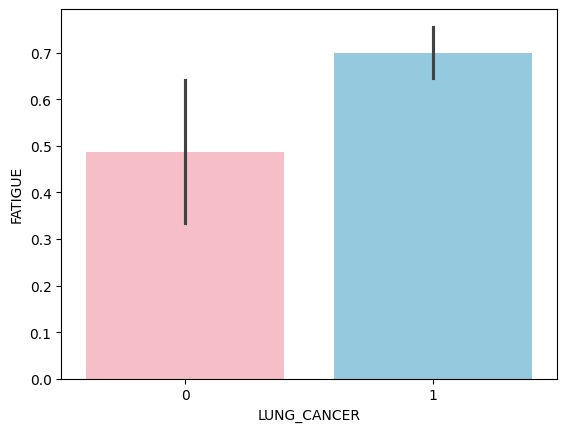

In [8]:
sns.barplot(x=df['LUNG_CANCER'],y=df['FATIGUE'],data=df, palette=['lightpink', 'skyblue'])

<Axes: xlabel='LUNG_CANCER', ylabel='ALLERGY'>

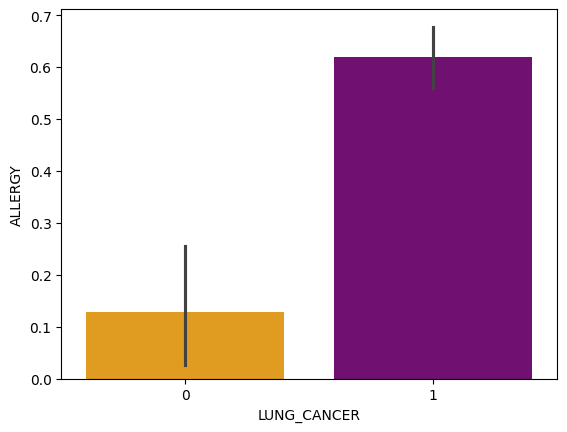

In [17]:
sns.barplot(x=df['LUNG_CANCER'],y=df['ALLERGY'],data=df, palette=['orange', 'purple'])

<Axes: xlabel='AGE', ylabel='SMOKING'>

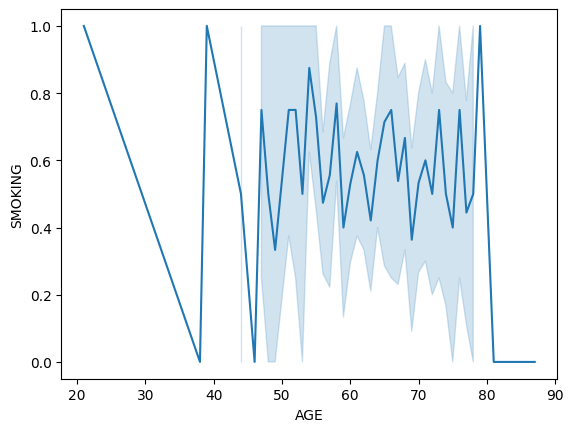

In [249]:
sns.lineplot(x=df['AGE'],y=df['SMOKING'],data=df)

<Axes: xlabel='AGE', ylabel='ALCOHOL CONSUMING'>

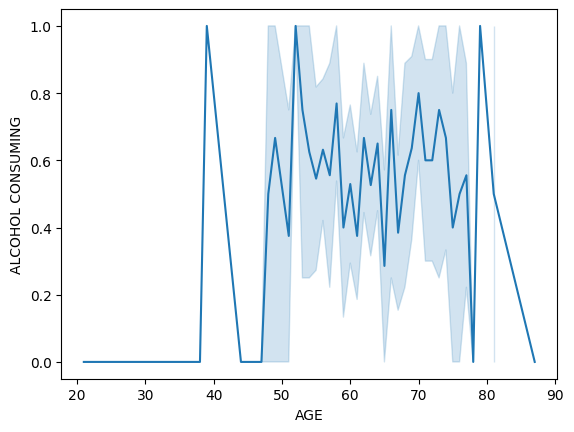

In [250]:
sns.lineplot(x=df['AGE'],y=df['ALCOHOL CONSUMING'],data=df)

<Axes: xlabel='AGE', ylabel='ANXIETY'>

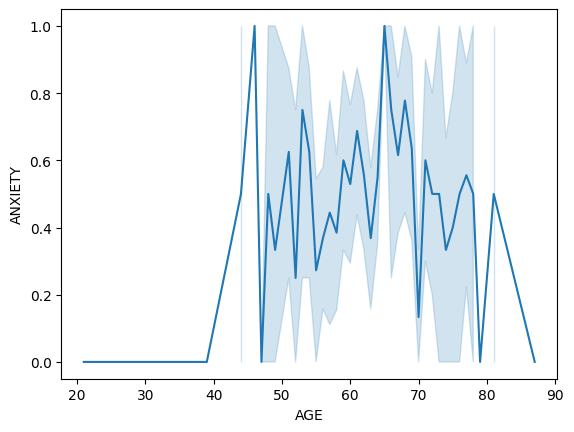

In [251]:
sns.lineplot(x=df['AGE'],y=df['ANXIETY'],data=df)

<Axes: xlabel='AGE', ylabel='CHEST PAIN'>

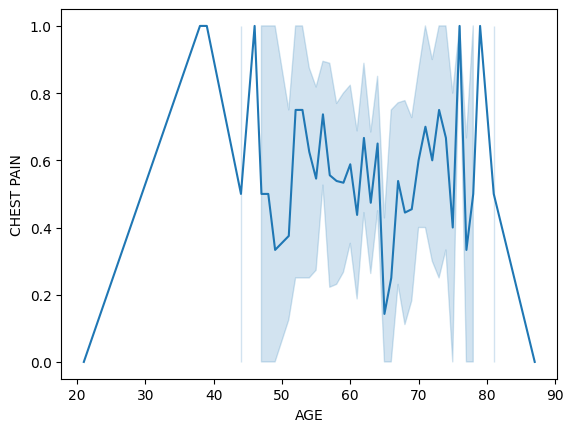

In [252]:
sns.lineplot(x=df['AGE'],y=df['CHEST PAIN'],data=df)

<Axes: xlabel='AGE', ylabel='FATIGUE'>

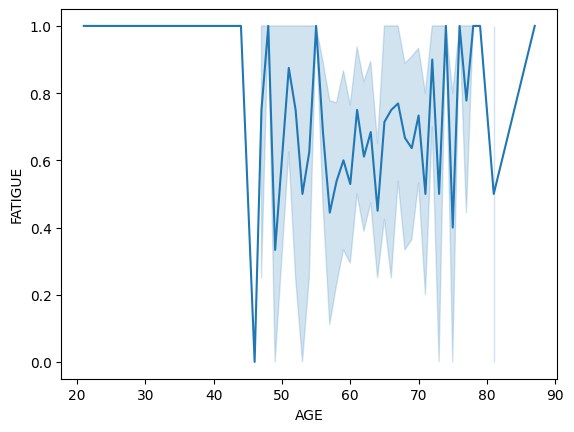

In [253]:
sns.lineplot(x=df['AGE'],y=df['FATIGUE'],data=df)

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

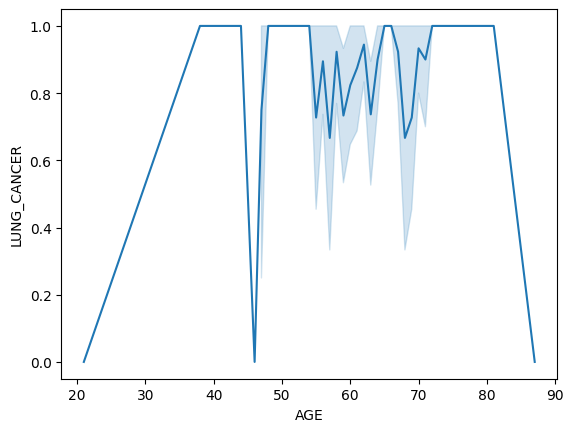

In [254]:
sns.lineplot(x=df['AGE'],y=df['LUNG_CANCER'],data=df)

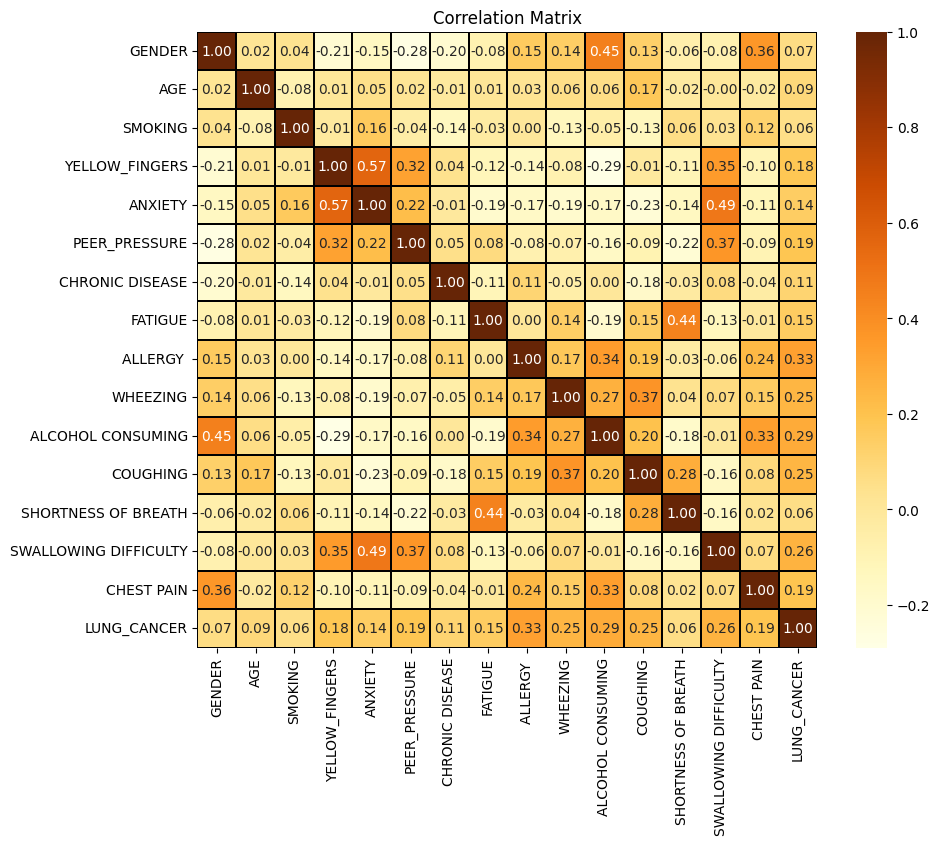

In [255]:
correlation_matrix = df.select_dtypes(include='number').corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,linewidths= 0.2, linecolor= 'black', fmt=".2f", cmap="YlOrBr")
plt.title('Correlation Matrix')
plt.show()

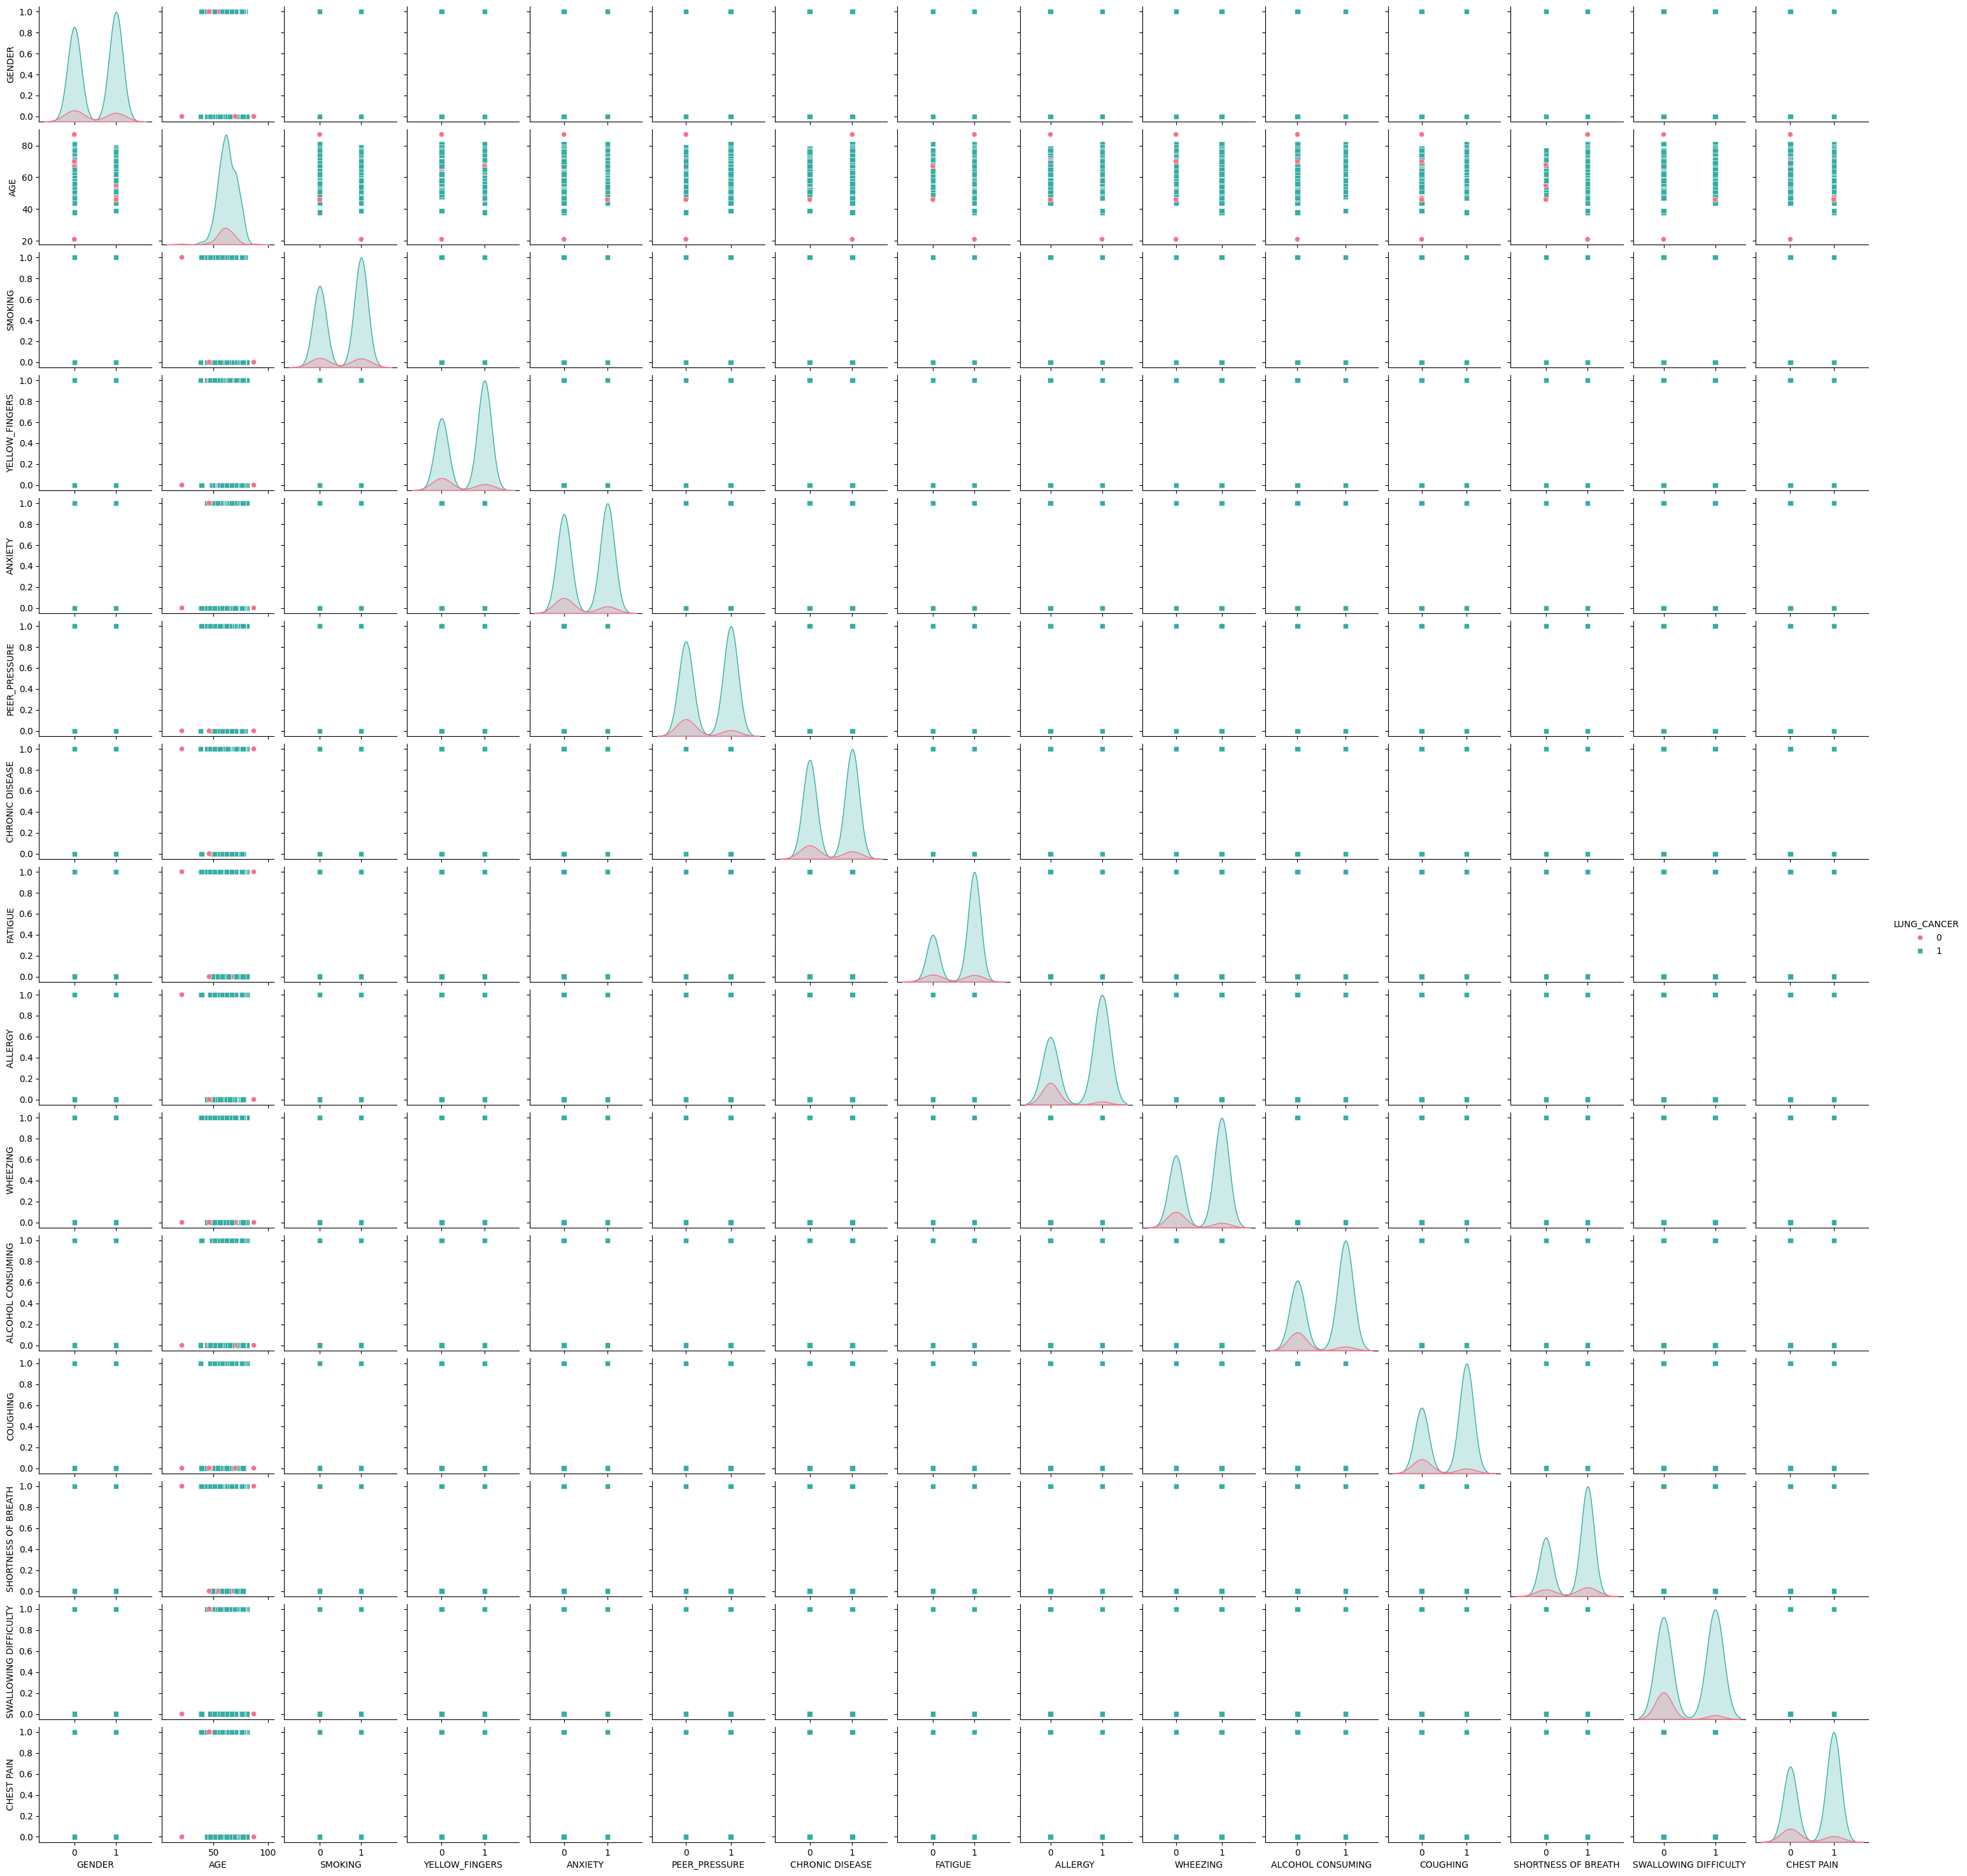

In [256]:
sns.pairplot(df,hue='LUNG_CANCER', diag_kind='kde', markers=["o", "s"], palette='husl', height=2)

In [257]:
# Data Preprocessing
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [258]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [259]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (405, 15)
Test shape: (135, 15)


# Feature Selection

In [260]:
# Feature Scaling
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
210,1,-0.924910,1,0,0,0,0,0,1,1,1,1,0,0,0
254,1,1.528191,0,1,0,0,1,1,1,1,1,1,1,0,1
83,0,2.386776,0,0,0,1,1,0,1,0,1,1,1,0,0
281,1,-0.802255,1,0,0,0,0,1,1,0,0,0,1,0,1
42,0,1.896156,0,1,1,1,1,1,0,1,1,0,0,0,0


# Model Development

In [261]:
# Model Development
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbour': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")

Training Logistic Regression...

LogisticRegression()
Accuracy: 0.9111
Precision: 0.9125
Recall: 0.9111
F1 Score: 0.9110

Training Decision Tree...

DecisionTreeClassifier()
Accuracy: 0.9407
Precision: 0.9470
Recall: 0.9407
F1 Score: 0.9405

Training Random Forest...

RandomForestClassifier()
Accuracy: 0.9556
Precision: 0.9592
Recall: 0.9556
F1 Score: 0.9555

Training Support Vector Machine...

SVC()
Accuracy: 0.9333
Precision: 0.9357
Recall: 0.9333
F1 Score: 0.9332

Training K-Nearest Neighbour...

KNeighborsClassifier()
Accuracy: 0.9259
Precision: 0.9293
Recall: 0.9259
F1 Score: 0.9258



# Cross-Validation

In [262]:
# Cross-Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f}\n")

Cross-validation scores for Logistic Regression: [0.90322581 0.93548387 0.87096774 0.90322581 0.96774194 0.96774194
 0.87096774 0.93548387 0.90322581 0.96666667]
Average Accuracy: 0.9225

Cross-validation scores for Decision Tree: [0.80645161 0.96774194 0.87096774 0.90322581 1.         0.90322581
 0.67741935 0.90322581 0.87096774 1.        ]
Average Accuracy: 0.8903

Cross-validation scores for Random Forest: [0.90322581 0.93548387 0.87096774 0.83870968 0.96774194 0.93548387
 0.87096774 0.93548387 0.93548387 0.96666667]
Average Accuracy: 0.9160

Cross-validation scores for Support Vector Machine: [0.87096774 0.87096774 0.87096774 0.87096774 0.87096774 0.87096774
 0.87096774 0.87096774 0.87096774 0.9       ]
Average Accuracy: 0.8739

Cross-validation scores for K-Nearest Neighbour: [0.87096774 0.87096774 0.87096774 0.80645161 0.93548387 0.90322581
 0.80645161 0.87096774 0.87096774 0.9       ]
Average Accuracy: 0.8706



# Hyperparameter Tuning

In [263]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},

    'K-Nearest Neighbour': {
        'n_neighbors' : [5,7,9,11,13,15],
        'weights' : ['uniform','distance']
    }
}

# Grid Search

In [264]:
# Hyperparameter Tuning
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]

    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 10}
Best Accuracy: 0.9355

Tuning hyperparameters for Decision Tree...
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9032

Tuning hyperparameters for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9289

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.9161

Tuning hyperparameters for K-Nearest Neighbour...
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy: 0.8869



# Random Search

In [265]:
# Hyperparameter Tuning with RandomizedSearchCV
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]

    # RandomizedSearchCV with 20 iterations
    random_search = RandomizedSearchCV(
        model, param_distributions=param_grid, n_iter=20, 
        cv=10, scoring='accuracy', random_state=42, n_jobs=-1
    )
    random_search.fit(X, y)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 10}
Best Accuracy: 0.9355

Tuning hyperparameters for Decision Tree...
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Best Accuracy: 0.8968

Tuning hyperparameters for Random Forest...
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy: 0.9225

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'kernel': 'linear', 'C': 1}
Best Accuracy: 0.9161

Tuning hyperparameters for K-Nearest Neighbour...
Best Parameters: {'weights': 'distance', 'n_neighbors': 7}
Best Accuracy: 0.8869



# Bayesian Optimisation

In [266]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning with Bayesian Optimization
def objective(trial, model_name):
    if model_name == 'Logistic Regression':
        C = trial.suggest_loguniform('C', 0.001, 100)
        model = LogisticRegression(C=C, max_iter=1000)
    elif model_name == 'Decision Tree':
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_depth = trial.suggest_int('max_depth', 2, 30, step=2)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        model = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    elif model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 150, step=10)
        max_depth = trial.suggest_int('max_depth', 2, 30, step=2)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    elif model_name == 'Support Vector Machine':
        C = trial.suggest_loguniform('C', 0.1, 10)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVC(C=C, kernel=kernel)
    elif model_name == 'K-Nearest Neighbour':
        n_neighbors = trial.suggest_categorical('n_neighbors', [5, 7, 9, 11, 13, 15])
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Perform cross-validation
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1).mean()
    return score

# Running Bayesian Optimization for each model
for model_name in models.keys():
    print(f"Tuning hyperparameters for {model_name}...")

    # Define the study
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=20)

    # Get best parameters and best score
    best_params = study.best_params
    best_score = study.best_value

    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Accuracy for {model_name}: {best_score:.4f}\n")

[I 2025-06-05 17:52:34,810] A new study created in memory with name: no-name-fffc72ef-c8b7-4e79-8be3-d3c9fc9366c3
[I 2025-06-05 17:52:34,857] Trial 0 finished with value: 0.9321505376344085 and parameters: {'C': 1.9371487997407821}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:34,905] Trial 1 finished with value: 0.9225806451612903 and parameters: {'C': 58.69822469757792}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:34,951] Trial 2 finished with value: 0.9225806451612903 and parameters: {'C': 76.70749767645503}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:34,977] Trial 3 finished with value: 0.8738709677419354 and parameters: {'C': 0.0018331139503536904}. Best is trial 0 with value: 0.9321505376344085.


Tuning hyperparameters for Logistic Regression...


[I 2025-06-05 17:52:35,035] Trial 4 finished with value: 0.9290322580645162 and parameters: {'C': 7.325042193322215}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:35,094] Trial 5 finished with value: 0.9225806451612903 and parameters: {'C': 99.69753436177326}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:35,153] Trial 6 finished with value: 0.9290322580645162 and parameters: {'C': 16.90643632721088}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:35,211] Trial 7 finished with value: 0.9258064516129032 and parameters: {'C': 7.0847171135082005}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:35,269] Trial 8 finished with value: 0.9290322580645162 and parameters: {'C': 18.522264602547747}. Best is trial 0 with value: 0.9321505376344085.
[I 2025-06-05 17:52:35,316] Trial 9 finished with value: 0.9289247311827957 and parameters: {'C': 1.1331837724935987}. Best is trial 0 with value: 0.9321505376344085.
[

Best Parameters for Logistic Regression: {'C': 2.5451969936617616}
Best Accuracy for Logistic Regression: 0.9355

Tuning hyperparameters for Decision Tree...


[I 2025-06-05 17:52:35,992] Trial 6 finished with value: 0.8901075268817203 and parameters: {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 5 with value: 0.8966666666666667.
[I 2025-06-05 17:52:36,020] Trial 7 finished with value: 0.8805376344086021 and parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.8966666666666667.
[I 2025-06-05 17:52:36,048] Trial 8 finished with value: 0.8708602150537634 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.8966666666666667.
[I 2025-06-05 17:52:36,073] Trial 9 finished with value: 0.8675268817204301 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.8966666666666667.
[I 2025-06-05 17:52:36,112] Trial 10 finished with value: 0.8803225806451612 and parameter

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3}
Best Accuracy for Decision Tree: 0.9063

Tuning hyperparameters for Random Forest...


[I 2025-06-05 17:52:36,732] Trial 0 finished with value: 0.8738709677419354 and parameters: {'n_estimators': 90, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8738709677419354.
[I 2025-06-05 17:52:36,936] Trial 1 finished with value: 0.8738709677419354 and parameters: {'n_estimators': 90, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8738709677419354.
[I 2025-06-05 17:52:37,242] Trial 2 finished with value: 0.8804301075268818 and parameters: {'n_estimators': 150, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8804301075268818.
[I 2025-06-05 17:52:37,513] Trial 3 finished with value: 0.9030107526881721 and parameters: {'n_estimators': 130, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.9030107526881721.
[I 2025-06-05 17:52:37,665] Trial 4 finished with value: 0.8933333333333333 and parameters: {'n_

Best Parameters for Random Forest: {'n_estimators': 100, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Accuracy for Random Forest: 0.9192

Tuning hyperparameters for Support Vector Machine...


[I 2025-06-05 17:52:41,202] Trial 7 finished with value: 0.9160215053763441 and parameters: {'C': 0.4120749605575874, 'kernel': 'linear'}. Best is trial 5 with value: 0.9161290322580646.
[I 2025-06-05 17:52:41,229] Trial 8 finished with value: 0.9063440860215053 and parameters: {'C': 0.17861266552870306, 'kernel': 'linear'}. Best is trial 5 with value: 0.9161290322580646.
[I 2025-06-05 17:52:41,257] Trial 9 finished with value: 0.8738709677419354 and parameters: {'C': 0.6978033084854749, 'kernel': 'rbf'}. Best is trial 5 with value: 0.9161290322580646.
[I 2025-06-05 17:52:41,329] Trial 10 finished with value: 0.9161290322580646 and parameters: {'C': 7.659766891352359, 'kernel': 'linear'}. Best is trial 5 with value: 0.9161290322580646.
[I 2025-06-05 17:52:41,410] Trial 11 finished with value: 0.9161290322580646 and parameters: {'C': 9.98532933009512, 'kernel': 'linear'}. Best is trial 5 with value: 0.9161290322580646.
[I 2025-06-05 17:52:41,471] Trial 12 finished with value: 0.91612903

Best Parameters for Support Vector Machine: {'C': 0.9640166550146057, 'kernel': 'linear'}
Best Accuracy for Support Vector Machine: 0.9161

Tuning hyperparameters for K-Nearest Neighbour...


[I 2025-06-05 17:52:41,963] Trial 7 finished with value: 0.8706451612903227 and parameters: {'n_neighbors': 13, 'weights': 'uniform'}. Best is trial 3 with value: 0.8868817204301076.
[I 2025-06-05 17:52:41,990] Trial 8 finished with value: 0.8804301075268818 and parameters: {'n_neighbors': 15, 'weights': 'distance'}. Best is trial 3 with value: 0.8868817204301076.
[I 2025-06-05 17:52:42,016] Trial 9 finished with value: 0.8804301075268818 and parameters: {'n_neighbors': 15, 'weights': 'distance'}. Best is trial 3 with value: 0.8868817204301076.
[I 2025-06-05 17:52:42,045] Trial 10 finished with value: 0.8868817204301076 and parameters: {'n_neighbors': 7, 'weights': 'distance'}. Best is trial 3 with value: 0.8868817204301076.
[I 2025-06-05 17:52:42,072] Trial 11 finished with value: 0.8868817204301076 and parameters: {'n_neighbors': 7, 'weights': 'distance'}. Best is trial 3 with value: 0.8868817204301076.
[I 2025-06-05 17:52:42,100] Trial 12 finished with value: 0.8868817204301076 and 

Best Parameters for K-Nearest Neighbour: {'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy for K-Nearest Neighbour: 0.8869



# Validation and Testing

In [267]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    print(f"\n{model}\nValidation Accuracy: {val_accuracy:.4f}\nValidation Precision: {val_precision:.4f}\nValidation Recall: {val_recall:.4f}\nValidation F1 Score: {val_f1:.4f}\n")

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\n{model}\nTest Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")

Testing Logistic Regression on validation set...

LogisticRegression()
Validation Accuracy: 0.9310
Validation Precision: 0.8668
Validation Recall: 0.9310
Validation F1 Score: 0.8978

Testing Logistic Regression on test set...

LogisticRegression()
Test Accuracy: 0.9111
Test Precision: 0.9125
Test Recall: 0.9111
Test F1 Score: 0.9110

Testing Decision Tree on validation set...

DecisionTreeClassifier()
Validation Accuracy: 0.9310
Validation Precision: 0.8668
Validation Recall: 0.9310
Validation F1 Score: 0.8978

Testing Decision Tree on test set...

DecisionTreeClassifier()
Test Accuracy: 0.9407
Test Precision: 0.9470
Test Recall: 0.9407
Test F1 Score: 0.9405

Testing Random Forest on validation set...

RandomForestClassifier()
Validation Accuracy: 0.9310
Validation Precision: 0.8668
Validation Recall: 0.9310
Validation F1 Score: 0.8978

Testing Random Forest on test set...

RandomForestClassifier()
Test Accuracy: 0.9556
Test Precision: 0.9592
Test Recall: 0.9556
Test F1 Score: 0.9555



Testing Logistic Regression on validation set...
Testing Logistic Regression on test set...


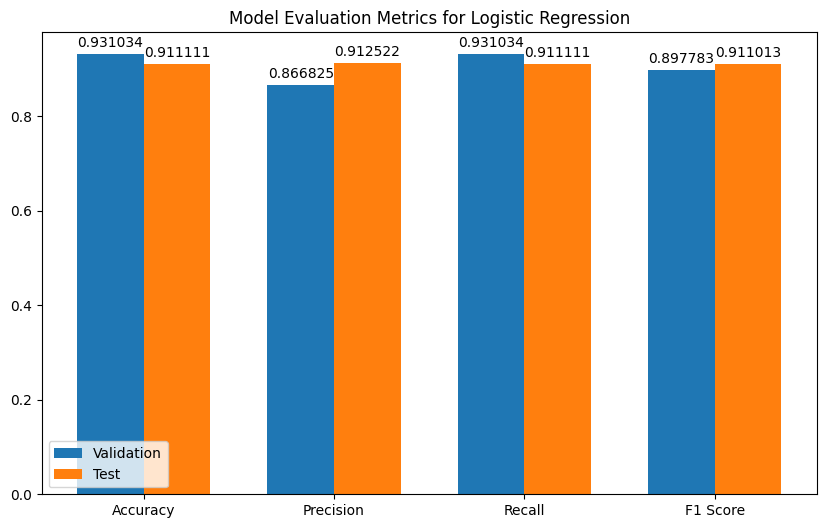

Testing Decision Tree on validation set...
Testing Decision Tree on test set...


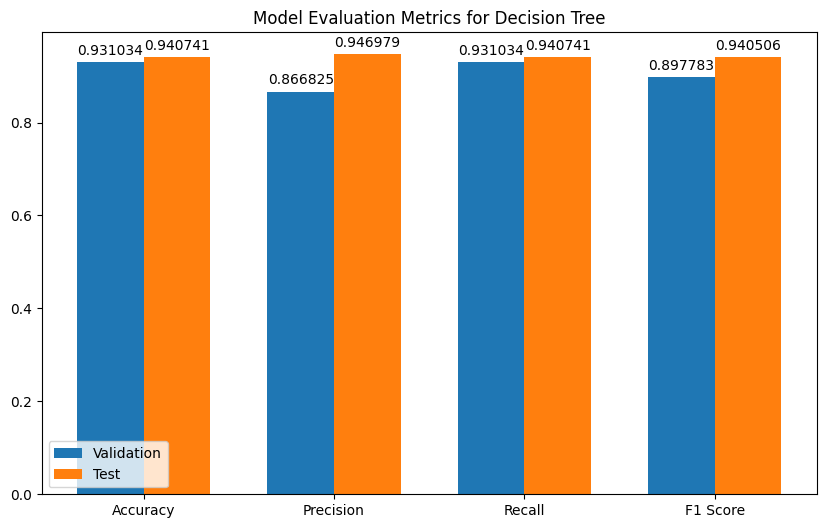

Testing Random Forest on validation set...
Testing Random Forest on test set...


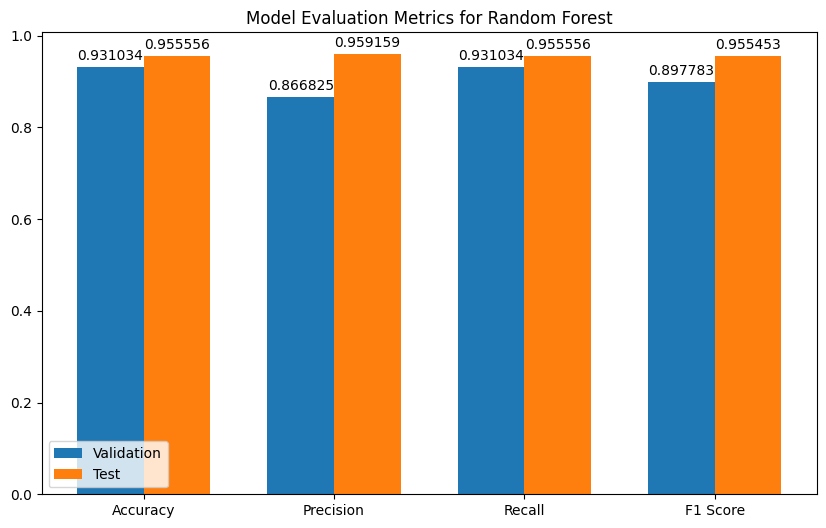

Testing Support Vector Machine on validation set...
Testing Support Vector Machine on test set...


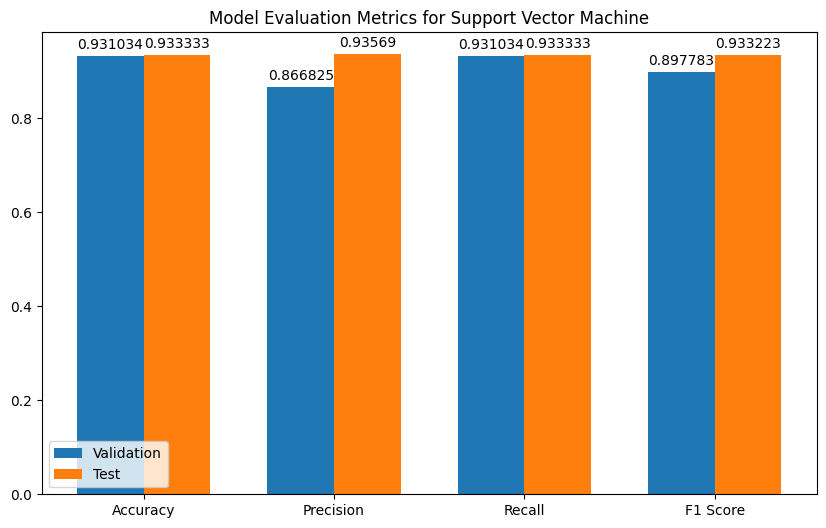

Testing K-Nearest Neighbour on validation set...
Testing K-Nearest Neighbour on test set...


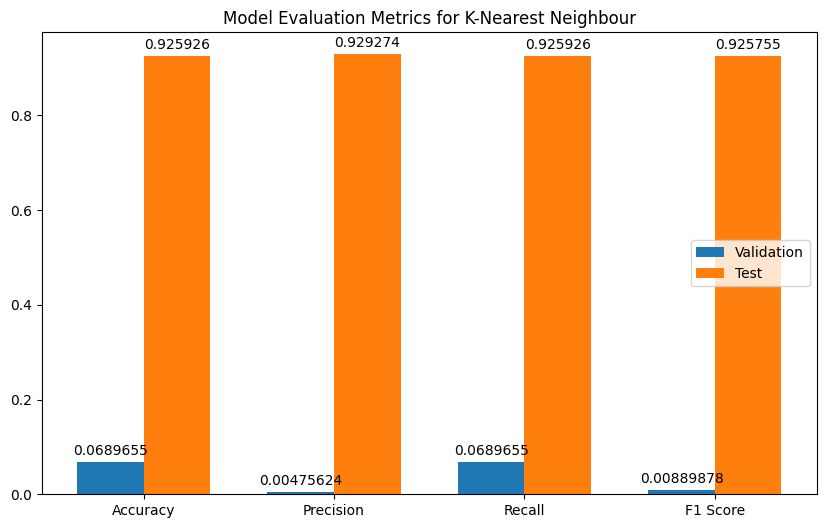

In [268]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    val_scores = [val_accuracy, val_precision, val_recall, val_f1]
    test_scores = [test_accuracy, test_precision, test_recall, test_f1]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, val_scores, width, label='Validation')
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    plt.title(f'Model Evaluation Metrics for {name}')
    plt.show()

# Confusion Matrix

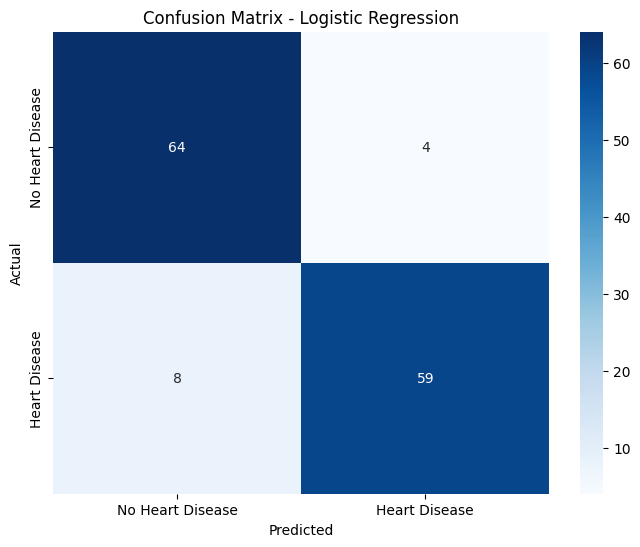

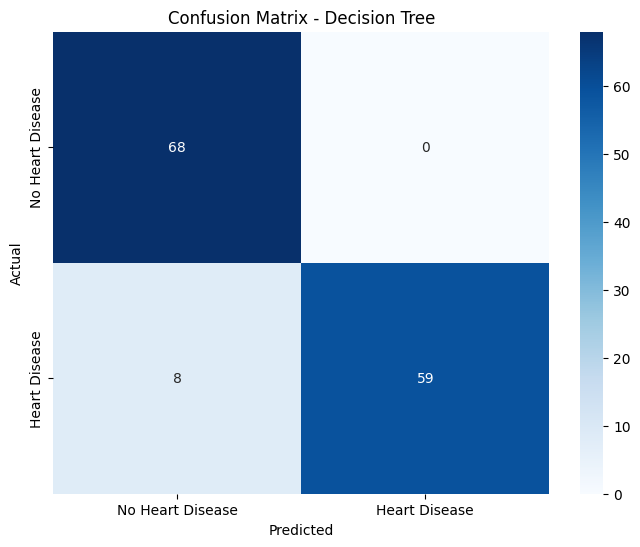

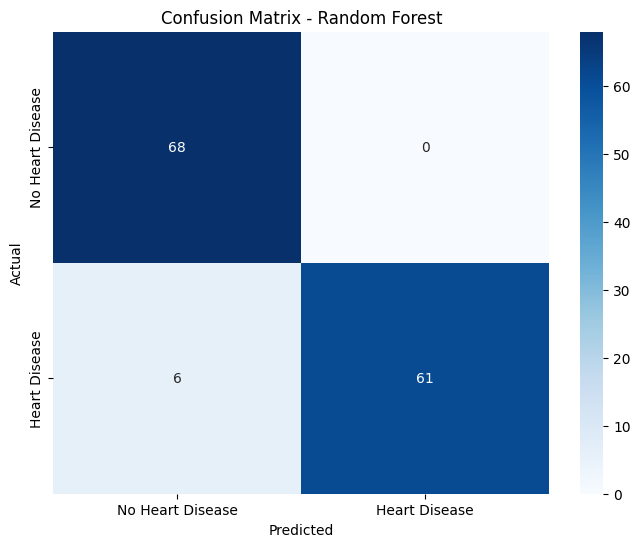

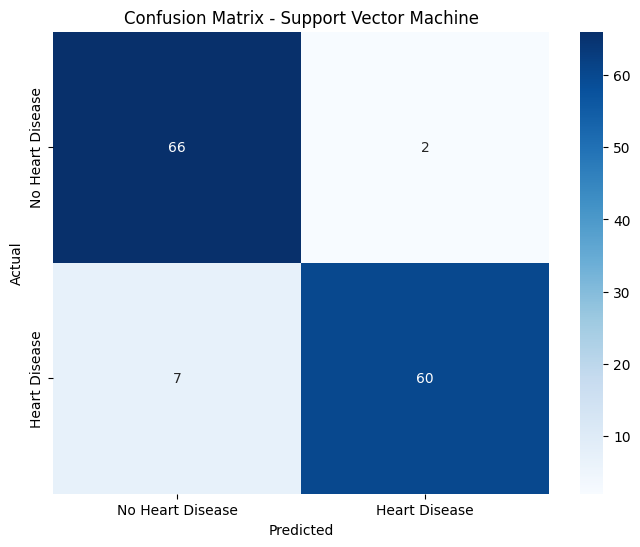

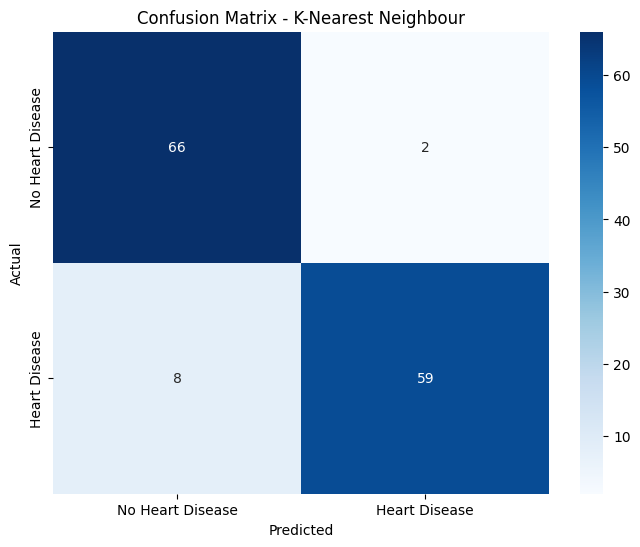

In [269]:
# Confusion Matrix for each model
for name, model in models.items():
    # Predictions on test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Updating Hyperparameters

In [277]:
# Define best hyperparameters from tuning
best_hyperparameters = {
    'Logistic Regression': {'C': 10},
    'Decision Tree': {
        'criterion': 'gini', 
        'max_depth': 20, 
        'min_samples_split': 10, 
        'min_samples_leaf': 3
    },
    'Random Forest': {
        'n_estimators': 100, 
        'max_depth': None, 
        'min_samples_split': 2, 
        'min_samples_leaf': 1
    },
    'Support Vector Machine': {'C': 1, 'kernel': 'linear'},

    'K-Nearest Neighbour': {
        'n_neighbors' : 7,
        'weights' : 'distance'
    }
}

# Update models with the best hyperparameters
for model_name, model in models.items():
    print(f"Updating hyperparameters for {model_name}...")
    model.set_params(**best_hyperparameters[model_name])
    print(f"Updated {model_name} with hyperparameters: {model.get_params()}")

Updating hyperparameters for Logistic Regression...
Updated Logistic Regression with hyperparameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Updating hyperparameters for Decision Tree...
Updated Decision Tree with hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Updating hyperparameters for Random Forest...
Updated Random Forest with hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_n

# Training Updated Model

In [278]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")

Training Logistic Regression...

LogisticRegression(C=10)
Accuracy: 0.9037
Precision: 0.9038
Recall: 0.9037
F1 Score: 0.9037

Training Decision Tree...

DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=10)
Accuracy: 0.8815
Precision: 0.8844
Recall: 0.8815
F1 Score: 0.8812

Training Random Forest...

RandomForestClassifier()
Accuracy: 0.9556
Precision: 0.9592
Recall: 0.9556
F1 Score: 0.9555

Training Support Vector Machine...

SVC(C=1, kernel='linear')
Accuracy: 0.9185
Precision: 0.9193
Recall: 0.9185
F1 Score: 0.9185

Training K-Nearest Neighbour...

KNeighborsClassifier(n_neighbors=7, weights='distance')
Accuracy: 0.9333
Precision: 0.9411
Recall: 0.9333
F1 Score: 0.9330



# Testing Updated Model

In [279]:
# Validation and Testing
for name, model in models.items():
    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\n{model}\nTest Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")

Testing Logistic Regression on test set...

LogisticRegression(C=10)
Test Accuracy: 0.9037
Test Precision: 0.9038
Test Recall: 0.9037
Test F1 Score: 0.9037

Testing Decision Tree on test set...

DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=10)
Test Accuracy: 0.8815
Test Precision: 0.8844
Test Recall: 0.8815
Test F1 Score: 0.8812

Testing Random Forest on test set...

RandomForestClassifier()
Test Accuracy: 0.9556
Test Precision: 0.9592
Test Recall: 0.9556
Test F1 Score: 0.9555

Testing Support Vector Machine on test set...

SVC(C=1, kernel='linear')
Test Accuracy: 0.9185
Test Precision: 0.9193
Test Recall: 0.9185
Test F1 Score: 0.9185

Testing K-Nearest Neighbour on test set...

KNeighborsClassifier(n_neighbors=7, weights='distance')
Test Accuracy: 0.9333
Test Precision: 0.9411
Test Recall: 0.9333
Test F1 Score: 0.9330



# Save the Model

In [280]:
# Train the final model on full training data
final_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=24,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

final_model.fit(X_train, y_train)

# Save the model using joblib
import joblib
joblib.dump(final_model, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']

In [281]:
# Load the model
loaded_model = joblib.load('final_random_forest_model.pkl')

# Use it for prediction
y_pred = loaded_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


KNeighborsClassifier(n_neighbors=7, weights='distance')
Accuracy: 0.9556
Precision: 0.9592
Recall: 0.9556
F1 Score: 0.9555



In [282]:
loaded_model = joblib.load('final_random_forest_model.pkl')
print(loaded_model.predict([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

[0]
